# Simulacióm de inversión

$C_n = C_0 (1 + i)^n + A * ((1 + i)^n - 1) / i$

$C_n$ = capital total después de n meses

$C_0$ = capital inicial

$r$   = tasa anual (decimal)

$m$   = periodos por año (usualmente 12)

$i$   = r / m   (tasa mensual)

$n$   = número total de meses

$A$   = aportación mensual

In [ ]:
import pandas as pd

In [ ]:
def simulador_inversion(capital_inicial, tasa_anual, meses, aportacion_mensual):
    tasa_mensual = (tasa_anual / 100) / 12
    capital = capital_inicial
    historial = []

    for mes in range(1, meses + 1):
        interes = capital * tasa_mensual
        capital += interes + aportacion_mensual

        historial.append({
            "Mes": mes,
            "Capital": round(capital, 2),
            "Interés Ganado": round(interes, 2)
        })

    return pd.DataFrame(historial)

In [ ]:
# Variable con los parámetros del test
parametros_prueba = {
    "capital_inicial": 10000,     #$10,000 iniciales
    "tasa_anual": 7.37,           #10.5% anual
    "meses": 12,                  #1 año
    "aportacion_mensual": 1500    # $2,500 al mes
}

df_test = simulador_inversion(**parametros_prueba)

display(df_test)

,Mes,Capital,Interés Ganado
0,1,11561.42,61.42
1,2,13132.42,71.01
2,3,14713.08,80.65
3,4,16303.44,90.36
4,5,17903.57,100.13
5,6,19513.53,109.96
6,7,21133.37,119.85
7,8,22763.17,129.79
8,9,24402.97,139.80
9,10,26052.85,149.87


# Ejercicio 2: Inflación

$$V_r = S_0 (1 + i)^{-n}$$

$V_r$ = Valor Real del salario en el año $n$

$S_0$ = Salario Nominal actual

$i$ = Tasa de inflación anual en decimal (inflacion_anual / 100)

$n$ = Número de años transcurridos

In [ ]:
def simulador_inflacion(salario_actual, inflacion_anual, años):
    historial = []
    salario_real = salario_actual

    for año in range(1, años + 1):
        salario_real /= (1 + inflacion_anual / 100)

        historial.append({
            "Año": año,
            "Valor real del salario": round(salario_real, 2)
        })

    return pd.DataFrame(historial)

In [ ]:
df = simulador_inflacion(
    salario_actual=20000,
    inflacion_anual=6,
    años=10
)

display(df)

,Año,Valor real del salario
0,1,18867.92
1,2,17799.93
2,3,16792.39
3,4,15841.87
4,5,14945.16
5,6,14099.21
6,7,13301.14
7,8,12548.25
8,9,11837.97
9,10,11167.90


# Ejercicio 3: Prestamo

$$R = P \cdot \frac{i(1+i)^n}{(1+i)^n - 1}$$

$R$ = Pago mensual

$P$ = Monto del préstamo

$i$ = Tasa de interés mensual

$n$ = Número de cuotas (plazo_meses)

In [ ]:
import numpy as np
import pandas as pd

def simulador_credito(monto_prestamo, tasa_anual, plazo_meses):
    tasa_mensual = tasa_anual / 12 / 100

    pago_mensual = monto_prestamo * (
        tasa_mensual * (1 + tasa_mensual)**plazo_meses
    ) / ((1 + tasa_mensual)**plazo_meses - 1)

    saldo = monto_prestamo
    historial = []
    pago_acumulado = 0

    for mes in range(1, plazo_meses + 1):
        interes = saldo * tasa_mensual
        capital_pagado = pago_mensual - interes
        saldo -= capital_pagado

        pago_acumulado += pago_mensual

        historial.append({
            "Mes": mes,
            "Pago": round(pago_mensual, 2),
            "Interés": round(interes, 2),
            "Capital pagado": round(capital_pagado, 2),
            "Saldo restante": round(max(saldo, 0), 2),
            "Pago acumulado": round(pago_acumulado, 2)
        })

    return pd.DataFrame(historial)


In [ ]:
df = simulador_credito(
    monto_prestamo=160000,
    tasa_anual=13,
    plazo_meses=36
)

display(df)

,Mes,Pago,Interés,Capital pagado,Saldo restante,Pago acumulado
0,1,5391.03,1733.33,3657.70,156342.30,5391.03
1,2,5391.03,1693.71,3697.32,152644.98,10782.06
2,3,5391.03,1653.65,3737.38,148907.60,16173.10
3,4,5391.03,1613.17,3777.87,145129.73,21564.13
4,5,5391.03,1572.24,3818.79,141310.94,26955.16
5,6,5391.03,1530.87,3860.16,137450.77,32346.19
6,7,5391.03,1489.05,3901.98,133548.79,37737.23
7,8,5391.03,1446.78,3944.25,129604.54,43128.26
8,9,5391.03,1404.05,3986.98,125617.56,48519.29
9,10,5391.03,1360.86,4030.18,121587.38,53910.32


# Ejercicio 4: Calcula el digito de control

La Clave Bancaria Estandarizada (CLABE) es una norma bancaria para la numeración de las cuentas bancarias en México.

La estandarización de la CLABE la emitió la Asociación de Bancos de México, junto con el Banco de México, y garantiza que las transferencias de fondos interbancarias, los depósitos de nómina o los cargos por servicios automáticos se lleven a cabo por las cantidades correctas.

3 dígitos: Código de banco

3 dígitos: Código de Plaza

11 dígitos: Número de cuenta bancaria

1 dígito: Dígito de control

In [ ]:
import pandas as pd
import requests
from io import StringIO

In [ ]:
URL = "https://es.wikipedia.org/wiki/CLABE"

headers = {
    "User-Agent": (
        "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
        "AppleWebKit/537.36 (KHTML, like Gecko) "
        "Chrome/120.0 Safari/537.36"
    )
}
response = requests.get(URL, headers=headers)
html = StringIO(response.text)
tablas = pd.read_html(html)

## Código de banco

In [ ]:
tablas[0]

,Número ABM,Nombre abreviado,Nombre de la institución,Participa como:
0,2,BANAMEX,"Banco Nacional de México, S.A.",R
1,6,BANCOMEXT,Banco Nacional de Comercio Exterior,?
2,9,BANOBRAS,Banco Nacional de Obras y Servicios Públicos,?
3,12,BBVA MÉXICO,"BBVA México, S.A.",R
4,14,SANTANDER,"Banco Santander, S.A.",R
...,...,...,...,...
94,710,NVIO,"NVIO Pagos México, S.A.P.I. de C.V., I.F.P.E.",?
95,722,MERCADO PAGO W,"MERCADO LIBRE, S.A. De C.V.",?
96,901,CLS,CLS Bank International,RC
97,902,INDEVAL,"SD. INDEVAL, S.A. de C.V.",RC


In [ ]:
bancos = tablas[0]

bancos["Número ABM"] = (
    bancos["Número ABM"]
    .astype(int)
    .astype(str)   #convertir a string
    .str.zfill(3)  #2 -> 002, 12 -> 012
)

display(bancos.head())

,Número ABM,Nombre abreviado,Nombre de la institución,Participa como:
0,002,BANAMEX,"Banco Nacional de México, S.A.",R
1,006,BANCOMEXT,Banco Nacional de Comercio Exterior,?
2,009,BANOBRAS,Banco Nacional de Obras y Servicios Públicos,?
3,012,BBVA MÉXICO,"BBVA México, S.A.",R
4,014,SANTANDER,"Banco Santander, S.A.",R


## Código de plaza

In [ ]:
tablas[1]

,Plaza,Nombre,Plaza.1,Nombre.1,Plaza.2,Nombre:
0,10,Aguascalientes,314,Zimapán,640.0,Zimatlán
1,12,Calvillo,320,El Salto,650.0,Cholula
2,14,Jesús María,320,Guadalajara,650.0,La Resurrección
3,20,Mexicali,320,San Pedro Tlaquepaque,650.0,Puebla
4,22,Ensenada,320,Tlajomulco,650.0,San Baltazar Campeche
...,...,...,...,...,...,...
149,305,Tepeapulco,634,Bahías de Huatulco,939.0,Loreto
150,308,Tizayuca,635,Santiago Juxtlahuaca,946.0,Nochistlán
151,311,Tula de Allende,636,Pinotepa Nacional,958.0,Valparaíso
152,312,Tulancingo,637,Tehuantepec,960.0,Calera de V. Rosales


In [ ]:
codigo_plaza = tablas[1]

codigo_plaza.columns = [
    "plaza_1", "nombre_1",
    "plaza_2", "nombre_2",
    "plaza_3", "nombre_3"
]

plazas = pd.concat([
    codigo_plaza[["plaza_1", "nombre_1"]].rename(columns={"plaza_1": "plaza", "nombre_1": "nombre"}),
    codigo_plaza[["plaza_2", "nombre_2"]].rename(columns={"plaza_2": "plaza", "nombre_2": "nombre"}),
    codigo_plaza[["plaza_3", "nombre_3"]].rename(columns={"plaza_3": "plaza", "nombre_3": "nombre"})
])

plazas = plazas.dropna()

plazas["plaza"] = (
    plazas["plaza"]
    .astype(float)   # asegurar numérico
    .astype(int)     # quitar .0
    .astype(str)     # convertir a string
    .str.zfill(3)    # rellenar con ceros
)

display(plazas.head())

,plaza,nombre
0,010,Aguascalientes
1,012,Calvillo
2,014,Jesús María
3,020,Mexicali
4,022,Ensenada


## Verificar una CLABE

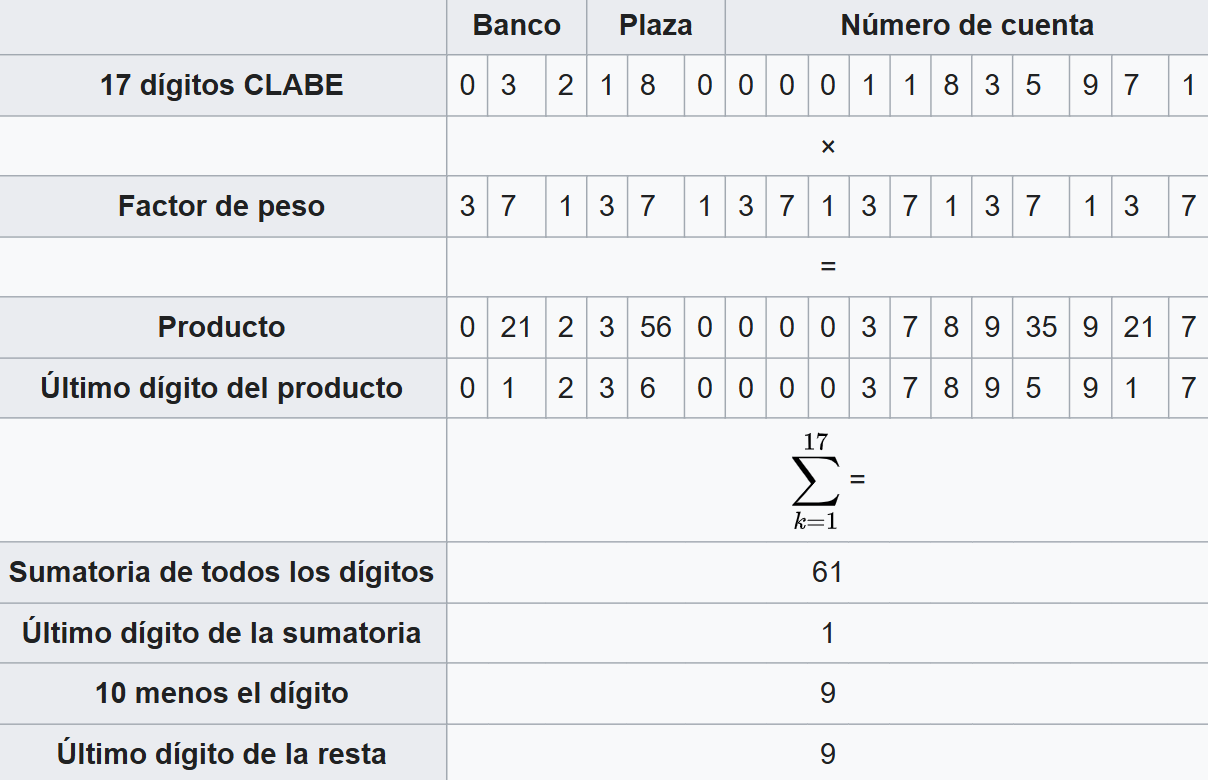

In [ ]:
def calcular_digito_control_clabe(clabe_17: str):
    pesos = [3, 7, 1] * 6
    pesos = pesos[:17]

    suma = 0

    for digito, peso in zip(clabe_17, pesos):
        producto = int(digito) * peso
        suma += producto % 10

    return (10 - (suma % 10)) % 10

In [ ]:
def validar_clabe(clabe: str):
    pesos = [3, 7, 1] * 6
    pesos = pesos[:17]

    clabe = clabe.strip()

    if len(clabe) != 18 or not clabe.isdigit():
        return {
            "valida": False,
            "error": "La CLABE debe tener exactamente 18 dígitos numéricos"
        }

    codigo_banco = clabe[:3]
    codigo_plaza = clabe[3:6]
    cuenta = clabe[6:17]
    digito_usuario = int(clabe[17])

    #Validar el banco
    if codigo_banco not in bancos['Número ABM'].values:
        return {
            "valida": False,
            "error": "Código de banco no reconocido",
            "codigo_banco": codigo_banco
        }

    #Validar plaza
    if codigo_plaza not in plazas['plaza'].values:
        return {
            "valida": False,
            "error": "Código de plaza no reconocido",
            "codigo_plaza": codigo_plaza
        }

    #Validar último dígito
    clabe_17 = clabe[:17]
    digito_calculado = calcular_digito_control_clabe(clabe_17)

    if digito_calculado != digito_usuario:
        return {
            "valida": False,
            "error": "Dígito verificador incorrecto",
            "esperado": digito_calculado,
            "recibido": digito_usuario
        }

    return {
        "valida": True,
        "banco": bancos.loc[bancos['Número ABM'] == codigo_banco, 'Nombre de la institución'].iloc[0],
        "plaza": plazas.loc[plazas['plaza'] == codigo_plaza, 'nombre'].iloc[0],
        "cuenta": cuenta,
        "mensaje": "CLABE válida"
    }

In [ ]:
clabe = "012456789012345674"
print("CLABE generada:", clabe)

resultado = validar_clabe(clabe)
print(resultado)

CLABE generada: 012456789012345674
{'valida': True, 'banco': 'BBVA México, S.A.', 'plaza': 'Tultitlán', 'cuenta': '78901234567', 'mensaje': 'CLABE válida'}
